In [ ]:
%config IPCompleter.greedy=True

In [2]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [5]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

# Before modification
# model.compile(optimizer = tf.train.AdamOptimizer(),
#              loss = 'sparse_categorical_crossentropy',
#              metrics=['accuracy'])
#

# After modification
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=5,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

2022-04-10 01:26:07.965797: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-10 01:26:07.966810: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/5
858/857 [==============================] - 136s 159ms/step - loss: 2.8231 - accuracy: 0.1408 - val_loss: 2.0122 - val_accuracy: 0.3536
Epoch 2/5
858/857 [==============================] - 140s 163ms/step - loss: 2.1433 - accuracy: 0.3198 - val_loss: 1.5084 - val_accuracy: 0.4736
Epoch 3/5
858/857 [==============================] - 141s 164ms/step - loss: 1.7754 - accuracy: 0.4264 - val_loss: 1.0643 - val_accuracy: 0.6424
Epoch 4/5
858/857 [==============================] - 122s 142ms/step - loss: 1.5227 - accuracy: 0.5018 - val_loss: 0.9061 - val_accuracy: 0.7004
Epoch 5/5
858/857 [==============================] - 122s 142ms/step - loss: 1.3718 - accuracy: 0.5525 - val_loss: 0.8966 - val_accuracy: 0.7091


In [ ]:
model.evaluate(testing_images, testing_labels)

{'loss': [2.82308066957224, 2.1433262852540413, 1.775375341865409, 1.5227061703999258, 1.3718266793926477], 'accuracy': [0.14077581, 0.3197596, 0.42640686, 0.5018394, 0.5524677], 'val_loss': [2.0121570226538465, 1.5084452615792168, 1.064296930646072, 0.9060957957032135, 0.896596043454291], 'val_accuracy': [0.3535973, 0.4736475, 0.6423592, 0.7003625, 0.7091467]}


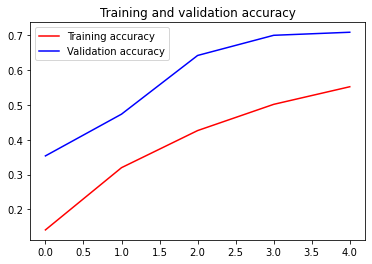

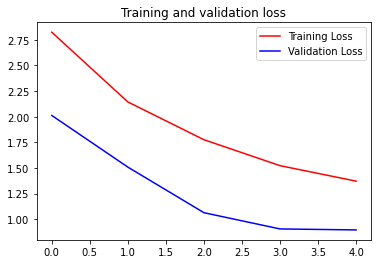

In [11]:
import matplotlib.pyplot as plt
print(history.history)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()